# 4.11 Eles estão se multiplicando!

## Objetivo:
Encontre o caminho de menor distância no problema do caixeiro viajante
considerando que existe mais do que um caixeiro viajante.


## Introdução

O problema consiste em descobrir a rota de menor distância entre $n$ pontos no plano cartesiano (ou seja, $n$ pontos com coordenadas $(x,y)$). A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. Considere que a rota entre um ponto e outro é a linha reta que liga os dois pontos. Cada trajeto descoberto é considerado o caminho do caixeiro.


## Descrição do problema:
<div style="text-align: justify">

Considere um número n ≥ 10 de coordenadas (x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. Os caixeiros só andam em linha reta e apenas entre duas cidades. Todos os caixeiros começam em cidades diferentes e jamais visitam cidades já visitadas por outros caixeiros.


In [1]:
from funcoes_caixeiros import plota_trajeto
from funcoes_caixeiros import cria_cidades
from funcoes_caixeiros import populacao_caixeiro as cria_populacao
from funcoes_caixeiros import funcao_objetivo_pop_caixeiro as funcao_objetivo
from funcoes_caixeiros import funcao_objetivo_caixeiro
from funcoes_caixeiros import selecao_torneio_min as funcao_selecao
from funcoes_caixeiros import cruzamento_multiplos_caixeiros as funcao_cruzamento
from funcoes_caixeiros import mutacao_caixeiros as funcao_mutacao1
from funcoes_caixeiros import mutacao_troca as funcao_mutacao2



## Resolução

Modificações feitas em [1]

<div style="text-align: justify">

**I) Modificação da forma de criação dos caixeiros:** Precisamos modificar essa função para atender a necessidade de criar dois caixeiros. Isso é feito de forma que o segundo caminho sorteado seja complementar ao primeiro, que pode ser sorteado aleatoriamente em um intervalo de 2 a 8 cidades. **Obs.:** Foi necessário converter a lista do caminho 2 em list porque o `random.sample()` não aceita sets.

```python
def cria_candidato_caixeiro(cidades): 

    """Sorteia um caminho possível no problema do caixeiro viajante

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """

    nomes_cidades = list(cidades.keys())
    num = random.randint(2,8)
    caminho_1 = random.sample(nomes_cidades, k=num)
    sub = list(set(nomes_cidades) - set(caminho_1)) 
    
    caminho_2 = random.sample(sub, k=len(sub)) 
    return caminho_1, caminho_2

**II) Modificação da Função Objetivo da população:** Precisamos modificar essa função para retornar o valor calculado para as distâncias percorridas finais dos dois caixeiros.

* `fitness`: Recebe a soma das duas distâncias para verificar o trajeto total percorrido.

```python

def funcao_objetivo_pop_caixeiro(populacao, cidades): 
  
    """Funcao objetivo de uma populacao no problema do caixeiro viajante

    Args:
      populacao: lista contendo os individuos do problema
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.

    """
    fitness = []

    for individuo in populacao:
        caixeiro_um = funcao_objetivo_caixeiro(individuo[0], cidades)
        caixeiro_dois = funcao_objetivo_caixeiro(individuo[1], cidades)
        fitness.append(caixeiro_um + caixeiro_dois)

    return fitness

<div style="text-align: justify">

**III) Modificação da função de cruzamento**: Para o cruzamento dos caixeiros, decidiu-se criar os filhos com um caixeiro do pai e outro da mãe, ambos sorteados aleatoriamente. Porém, o grande problema são os indivíduos repetidos e faltantes, sendo necessária a criação da função `corrigir_duplicatas_e_faltantes`, na qual analisa quais cidades estão repetidas nos dois caixeiros e retorna uma lista sem repetições e completa com as cidades que faltam para finalizar a rota.

```python
def cruzamento_multiplos_caixeiros(pai, mae, chance_de_cruzamento, cidades):
    if random.random() < chance_de_cruzamento:
        caixeiro_pai_1 = random.choice(pai)
        caixeiro_mae_1 = random.choice(mae)

        filho1 = corrigir_duplicatas_e_faltantes(caixeiro_pai_1, caixeiro_mae_1, cidades)

        caixeiro_pai_2 = random.choice(pai)
        caixeiro_mae_2 = random.choice(mae)
        filho2 = corrigir_duplicatas_e_faltantes(caixeiro_mae_2, caixeiro_pai_2, cidades)

        return filho1, filho2
    else:
        return pai[:], mae[:]

def corrigir_duplicatas_e_faltantes(c1, c2, cidades_referencia):
    conjunto_c1 = set(c1)
    caixeiro2_corrigido = [cidade for cidade in c2 if cidade not in conjunto_c1]

    usadas = set(c1 + caixeiro2_corrigido)
    
    faltando = [cidade for cidade in cidades_referencia if cidade not in usadas]
    caixeiro2_corrigido += faltando

    return [c1[:], caixeiro2_corrigido]

```

**IV) Modificações para as funções de mutação:** Para esse caso decidimos elaborar uma mutação para trocar elementos entre caixeiros, com `mutacao_caixeiros`. Nessa função substituímos um dos elementos de `caixeiro1` por um do `caixeiro2` escolhido aleatóriamente e vice-versa. Também utilizamos a mutação de troca conforme lecionado em sala de aula para realizar a troca de um dos elementos do caixeiro por outro. Assim, melhoramos o desempenho do modelo.

```python
def mutacao_caixeiros(populacao, chance_de_mutacao):
    for caixeiro1, caixeiro2 in populacao:
        if random.random() < chance_de_mutacao:
            sorteio_caixeiro1 = random.randint(0, len(caixeiro1)-1)
            sorteio_caixeiro2 = random.randint(0, len(caixeiro2)-1)

            caixeiro1[sorteio_caixeiro1], caixeiro2[sorteio_caixeiro2] = (
                caixeiro2[sorteio_caixeiro2], caixeiro1[sorteio_caixeiro1]) 


def mutacao_troca(populacao, chance_de_mutacao):
    """Aplica mutacao de troca em um indivíduo

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuos in populacao:
        individuo = random.choice(individuos)
        if random.random() < chance_de_mutacao:
            gene1 = random.randint(0, len(individuo) - 1)
            gene2 = random.randint(0, len(individuo) - 1)

            while gene1 == gene2:
                gene1 = random.randint(0, len(individuo) - 1)
                gene2 = random.randint(0, len(individuo) - 1)

            individuo[gene1], individuo[gene2] = (
                individuo[gene2],
                individuo[gene1],
            )
```

<div style="text-align: justify">

**V) Modificação da forma como os trajetos são plotados:** nessa etapa foi adicionada uma seção de código referente ao caminho plotado para o caixeiro 2, recuperando essa informação por meio do índice da variável trajetos que tem a estrutura `trajetos["caixeiro1", "caixeiro2"]`.

```python
def plota_trajeto(cidades, trajetos): #MODIFICAÇÕES PARA PLOTAR 2 TRAJETOS
    """Plota o trajeto do caixeiro

    Nota: código de base criado pelo Google Gemini e modificado aqui.

    Args:
      cidades:
        Dicionário contendo o nome das cidades como chaves e a coordenada no
        plano cartesiano das cidades como valores.
      trajeto: lista contendo a ordem das cidades que foram viszitadas

    """
    x = [cidades[cidade][0] for cidade in cidades]
    y = [cidades[cidade][1] for cidade in cidades]

    # plotando as cidades
    plt.scatter(x, y, color="blue")

    # nomes das cidades
    for cidade, (x, y) in cidades.items():
        plt.annotate(
            cidade,
            (x, y),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    # plotando os trajetos
    colors = ['red', 'blue']
    for num, trajeto in enumerate(trajetos):
        for i in range(len(trajeto) - 1):
            cidade1 = trajeto[i]
            cidade2 = trajeto[i + 1]
            plt.plot(
                [cidades[cidade1][0], cidades[cidade2][0]],
                [cidades[cidade1][1], cidades[cidade2][1]],
                color=colors[num],
            )

    # trajeto de volta à cidade inicial
    cidade_final_um = trajetos[0][-1]
    cidade_inicial_um = trajetos[0][0]
    plt.plot(
        [cidades[cidade_final_um][0], cidades[cidade_inicial_um][0]],
        [cidades[cidade_final_um][1], cidades[cidade_inicial_um][1]],
        color="red",
    )

    cidade_final_dois = trajetos[1][-1]
    cidade_inicial_dois = trajetos[1][0]
    plt.plot(
        [cidades[cidade_final_dois][0], cidades[cidade_inicial_dois][0]],
        [cidades[cidade_final_dois][1], cidades[cidade_inicial_dois][1]],
        color="blue",
    )
    

    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.show()



<div style="text-align: justify">

**VI) Implementação do código de algoritmos genéticos**: Nessa parte, implementamos o código normalmente. Diminuímos a chance de mutação por conta de estarmos usando duas funções de mutação, para evitar que o modelo não convirja por excesso de mutações.

In [2]:
NUM_CIDADES = 10
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 50
NUM_GERACOES = 100
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.025
TAMANHO_TORNEIO = 3

In [3]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)

In [4]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao, CIDADES)
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)

    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO, CIDADES.keys())
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)

    # Mutação
    funcao_mutacao1(proxima_geracao, CHANCE_DE_MUTACAO)

    funcao_mutacao2(proxima_geracao, CHANCE_DE_MUTACAO)

    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao, CIDADES)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
[['Cidade 00', 'Cidade 03', 'Cidade 08'], ['Cidade 01', 'Cidade 02', 'Cidade 09', 'Cidade 05', 'Cidade 06', 'Cidade 07', 'Cidade 04']] com distância: 722.5818794647505



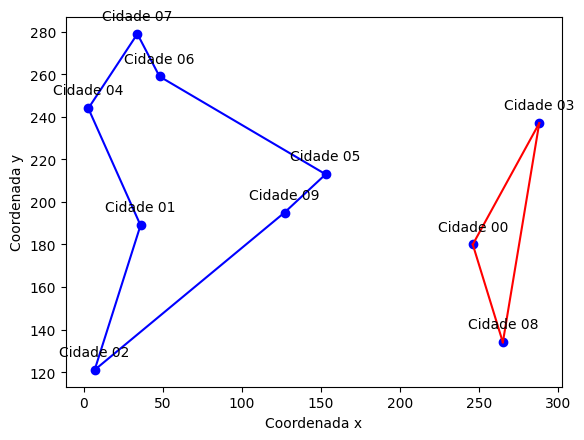

In [5]:
fitness = funcao_objetivo(hall_da_fama, CIDADES)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia_um = funcao_objetivo_caixeiro(melhor_individuo_observado[0], CIDADES)
distancia_dois = funcao_objetivo_caixeiro(melhor_individuo_observado[1], CIDADES)

distancia = distancia_um + distancia_dois

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)

## Conclusão
<div style="text-align: justify">

&nbsp;&nbsp;&nbsp;&nbsp;Nesse problema foi necessário implementar várias modificações para adequar o código para um segundo caixeiro. Apesar da série de modificações que fizemos, as principais estão nas funções de mutação e cruzamento. Para a mutação, pensamosque seria interessante substituir elementos entre os caixeiros (tirando uma cidade do caixeiro 1 e colocando no caixeiro 2 e vice-versa) e realizar a mutação de uma cidade dentro do caixeiro, com a função de mutação de troca. A partir disso, aumentamos a variabilidade genética, melhorando o desempenho. Quanto ao cruzamento, escolhemos cruzar os elementos combinando os caixeiros para gerar filhos e realizando a devida correção para evitar indivíduos inválidos.

### Referências

[1].CASSAR, Daniel. [Material de sala de aula]. Redes Neurais e Algoritmos Genéticos, 2025, Ilum - Escola de Ciência.